In [7]:
#!/usr/bin/env python3
# coding: utf-8
import sys
import argparse
import random
import numpy as np 
import time
import math
sys.setrecursionlimit(3000)


# first command line argument is the array size
#array_size = int(sys.argv[1])+0

array_size = 100

# read the value of k (i.e we are looking for the k-th smallest value in the array)
#k = int(sys.argv[2]) + 0
k = 5

# read the value of m (i.e if the size of the array is less than m, we sort and select)
m = 113

# fill the array with random values
my_array = [random.randint(1,100*array_size) for _ in range(array_size)]

# sort the array and pick the k-th smallest element from the sorted-array
def sort_and_select(current_array, k) :
    # sort the array
    sorted_current_array = np.sort(current_array)
    return sorted_current_array[k]

def deterministic_select(current_array, k, m) :
    if (len(current_array) <= m) :
        # just use any method to pick the k-th smallest element in the array
        # I am using the sort-and-select method here
        return sort_and_select(current_array, k)
    else : 
        # I need this array to compute the median-of-medians...
        medians_of_smaller_arrays_of_size_five = []
        
        # first, split current_array into smaller arrays with 5 elements each
        # there might be a better way than what I am doing... but this will work... 
        for i in range(0,len(current_array),5):
            smaller_array_of_size_five = []
            smaller_array_of_size_five.extend([current_array[i]])
            if ((i + 1) < len(current_array)) :
                smaller_array_of_size_five.extend([current_array[i+1]])
            if ((i + 2) < len(current_array)) :
                smaller_array_of_size_five.extend([current_array[i+2]])
            if ((i + 3) < len(current_array)) :
                smaller_array_of_size_five.extend([current_array[i+3]])
            if ((i + 4) < len(current_array)) :
                smaller_array_of_size_five.extend([current_array[i+4]])
            
            # we need each of these cases as len(smaller_array_of_size_five) can be anything between 1 and 5
            # based on len(smaller_array_of_size_five) we are computing the median of smaller_array_of_size_five for each case
            if (len(smaller_array_of_size_five) == 5) :
                medians_of_smaller_arrays_of_size_five.extend([deterministic_select(smaller_array_of_size_five,3, m)])
            if (len(smaller_array_of_size_five) == 4) :
                medians_of_smaller_arrays_of_size_five.extend([(deterministic_select(smaller_array_of_size_five,2, m)+deterministic_select(smaller_array_of_size_five,3, m))/2])
            if (len(smaller_array_of_size_five) == 3) :
                medians_of_smaller_arrays_of_size_five.extend([deterministic_select(smaller_array_of_size_five,2, m)])
            if (len(smaller_array_of_size_five) == 2) :
                medians_of_smaller_arrays_of_size_five.extend([(smaller_array_of_size_five[0]+smaller_array_of_size_five[1])/2])
            if (len(smaller_array_of_size_five) == 1) :
                medians_of_smaller_arrays_of_size_five.extend([smaller_array_of_size_five[0]])

        # compute the meadian of the medians_of_smaller_arrays_of_size_five array by recursion
        p = deterministic_select(medians_of_smaller_arrays_of_size_five, int(len(medians_of_smaller_arrays_of_size_five)/2), m)
        # split the current_array into three sub-arrays: Less_than_p, Equal_to_p and Greater_than_p
        Less_than_p = []
        Equal_to_p = []
        Greater_than_p = []
        for x in current_array : 
            if (x < p) : 
                Less_than_p.extend([x])
            if (x == p) : 
                Equal_to_p.extend([x])
            if (x > p) : 
                Greater_than_p.extend([x])
                
        if (k < len(Less_than_p)) :
            return deterministic_select(Less_than_p, k, m)
        elif (k >= len(Less_than_p) + len(Equal_to_p)) : 
            return deterministic_select(Greater_than_p, k - len(Less_than_p) - len(Equal_to_p), m)
        else :
            return p

print("Looking for the ", k, "-th smallest element in a ", len(my_array), "long array")

t0 = time.time()
sorted_my_array = np.sort(my_array)
t1 = time.time()

print ("Sort-and-Pick Method        : ", sort_and_select(my_array, k))
t2 = time.time()
print ("Deterministic-Select Method : ", deterministic_select(my_array, k, m))
t3 = time.time()

print ("It took ", t1-t0, "seconds for the Sort-and-Pick Method")
print ("It took ", t3-t2, "seconds for the Randomized-Select Method")



Looking for the  5 -th smallest element in a  100 long array
Sort-and-Pick Method        :  255
Deterministic-Select Method :  255
It took  0.00017309188842773438 seconds for the Sort-and-Pick Method
It took  0.0013871192932128906 seconds for the Randomized-Select Method


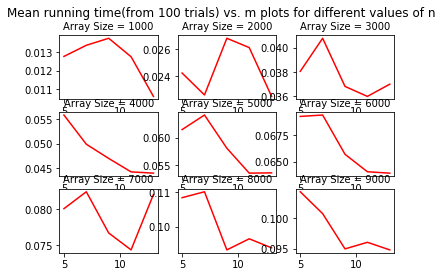

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
#pdf = PdfPages('dbagchi2_hw2_plots.pdf')

# for making 9 plots in a grid
fig, axes = plt.subplots(3, 3)
fig.suptitle("Mean running time(from 100 trials) vs. m plots for different values of n", fontsize = 12)
f_row = 0
f_col = 0

# n is the array size 
list_of_n = list(range(1000, 10000, 1000))

# list of all the mimimun number for sort and select
list_of_m = [5, 7, 9, 11, 13]

for n in list_of_n:
    # list to have 5 average time for each n
    list_for_time_for_each_n = []
    # m is the value for the sort and select algorithm
    for m in list_of_m:
        run_time_list = []
        for number_of_experiments in range(1, 100):
            # number_of_experiments is to run the number of experiments to get the average running time 
            my_array = [random.randint(1, 100 * n) for _ in range(n)]
            k = math.ceil(n / 2)
            t0 = time.time()
            deterministic_select(my_array, k, m)
            t1 = time.time()
            time_taken_for_one_run = t1 - t0
            run_time_list.append(time_taken_for_one_run)
        avg_running_time = sum(run_time_list) / len(run_time_list)
        # appending average running timelist for 5-m many values
        list_for_time_for_each_n.append(avg_running_time)
    
    # Plotting the graph for each n 
    axes[f_row, f_col].plot(list_of_m, list_for_time_for_each_n, color = 'red')
    axes[f_row, f_col].set_title('Array Size = ' + str(n), fontsize = 10)
    f_col = f_col + 1
    if (f_col > 2):
        f_row = f_row + 1
        f_col = 0
#plt.show()
fig.savefig("dbagchi2_hw2_plots.pdf")

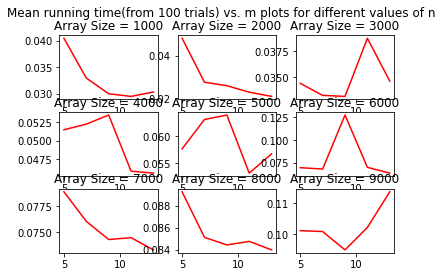

In [71]:
fig